[API Reference - scikit-learn: Samples generator](https://scikit-learn.org/stable/modules/classes.html#samples-generator)

- - -

In [1]:
import numpy  as np
import pandas as pd
import os

import hashlib
import datetime
import warnings
import pickle
import gc

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn           as sns

In [3]:
from IPython.display import display

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = [13, 7]

# sampling

## regressão 

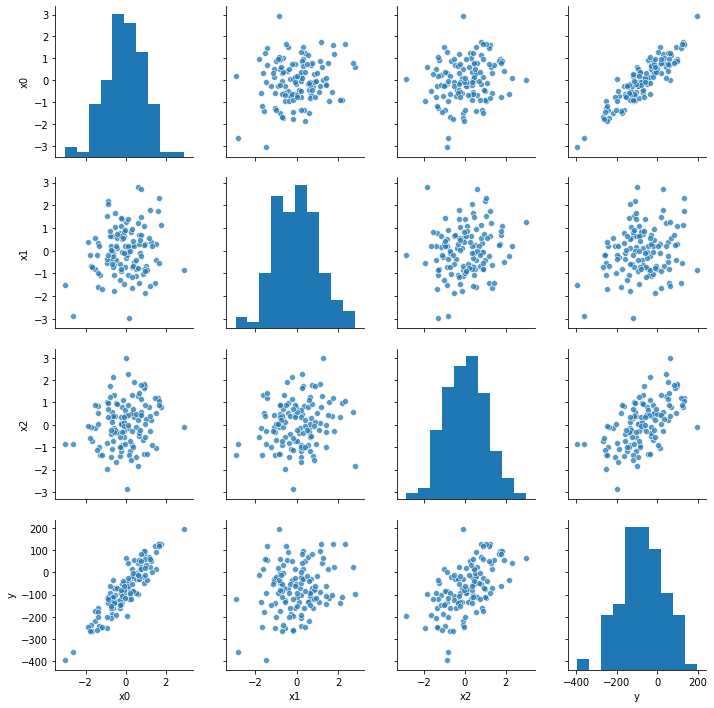

In [4]:
from sklearn.datasets import make_regression

NUM   = 123
BIAS  = np.random.randint(-123, 123)
NOISE = np.random.randint(-12, 12)

data = make_regression(n_samples     = NUM, 
                       n_features    = 3, 
                       n_informative = 2, 
                       n_targets     = 1,
                       bias          = BIAS,
                       noise         = NOISE)

df      = pd.DataFrame( data[0], columns = [ 'x{}'.format(str(i)) for i in range(len(data[0][1])) ] )
df['y'] = data[1]

sns.pairplot(df, plot_kws={'alpha':0.75} );

### univariate non-linear sampling

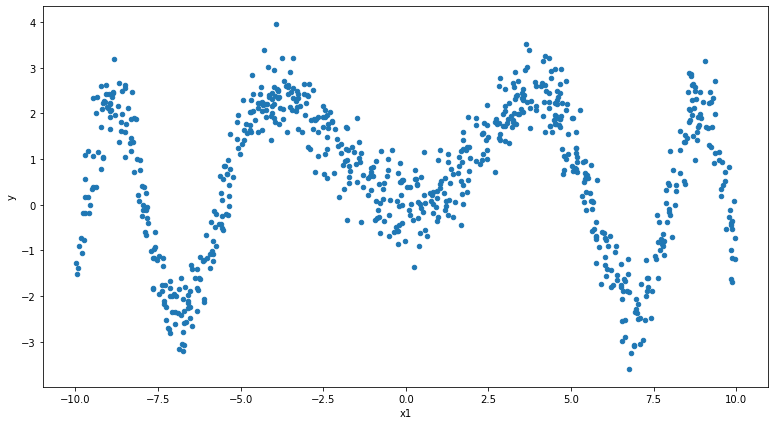

In [23]:
NUM = 789
X   = np.random.uniform( -10, 10, NUM )
y   = 2 * np.exp(1/(np.abs(X)+1)) * np.sin( 0.1 * X**2 ) + 0.5 * np.random.randn( NUM )

df      = pd.DataFrame( X, columns = ['x1'] )
df['y'] = y

df.plot(kind='scatter', x='x1', y='y')

## classificação

### 2 classes with `make_classification`

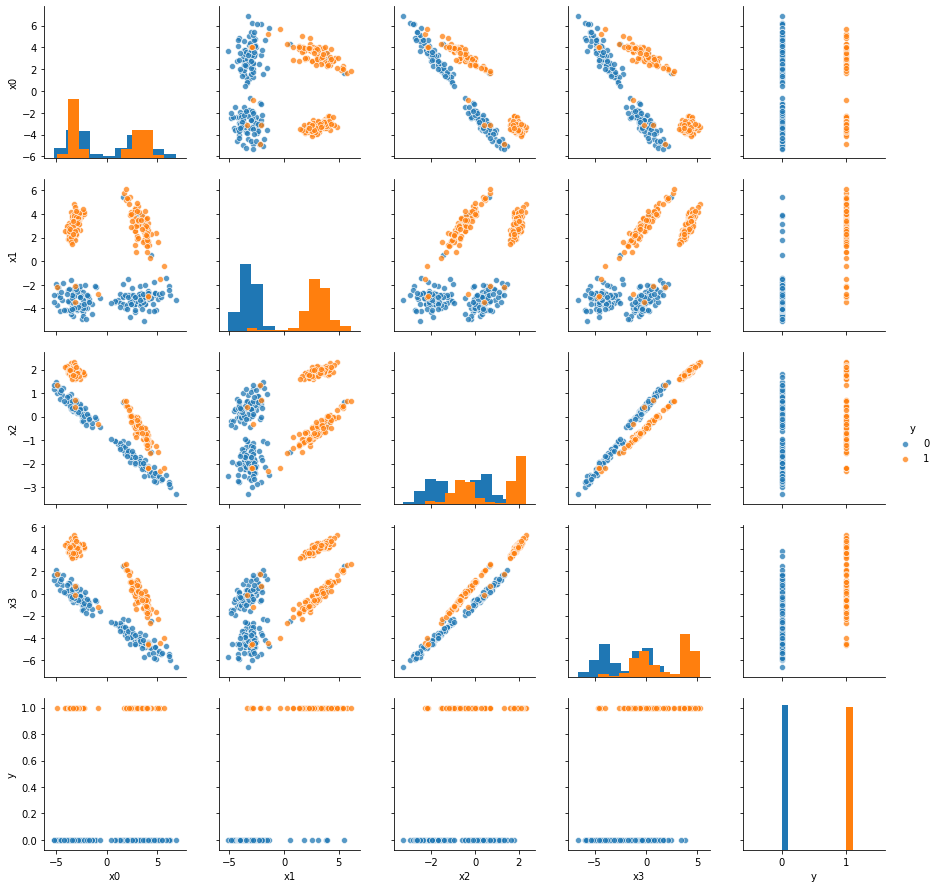

In [29]:
from sklearn.datasets import make_classification

data = make_classification(n_samples     = 350, 
                            n_features    = 4, 
                            n_informative = 2, 
                            n_classes     = 2,
                            flip_y        = 0.1,
                            class_sep     = 3.21)

df      = pd.DataFrame( data[0], columns = [ 'x{}'.format(str(i)) for i in range(len(data[0][1])) ] )
df['y'] = data[1]

sns.pairplot(df, plot_kws={'alpha':0.75}, hue='y', diag_kind="hist");

### 3 classes with `make_multilabel_classification`

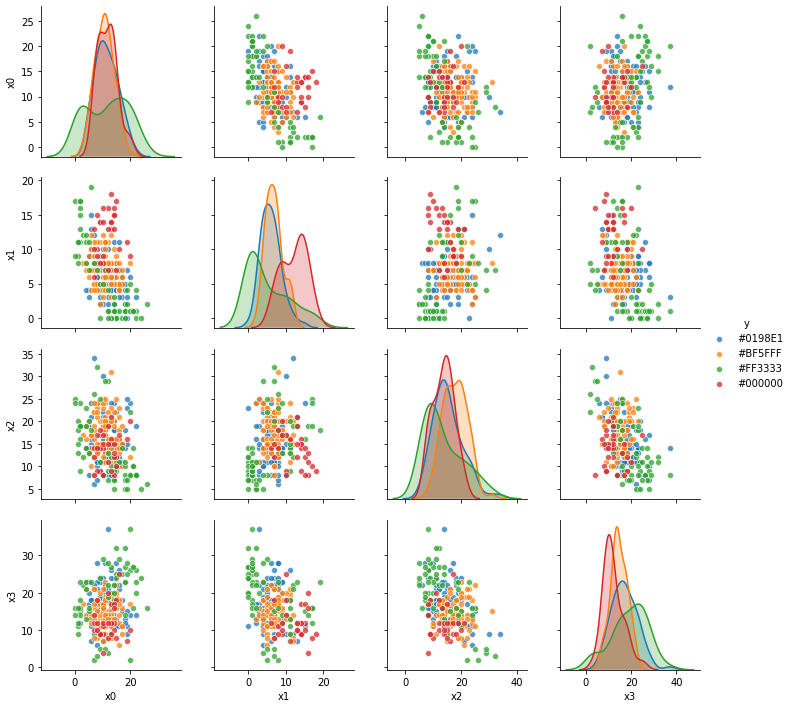

In [31]:
from sklearn.datasets import make_multilabel_classification

COLORS = np.array(['#000000',
                   '#FF3333',  # red
                   '#0198E1',  # blue
                   '#BF5FFF',  # purple
                   '#FCD116',  # yellow
                   '#FF7216',  # orange
                   '#4DBD33',  # green
                   '#87421F'   # brown
                   ])

data = make_multilabel_classification(n_samples     = 250, 
                                      n_features    = 4, 
                                      n_classes     = 3, 
                                      n_labels      = 3)

df      = pd.DataFrame( data[0], columns = [ 'x{}'.format(str(i)) for i in range(len(data[0][1])) ] )
df['y'] = COLORS.take((data[1]).sum(axis=1))

sns.pairplot(df, plot_kws={'alpha':0.75}, hue='y', diag_kind="kde");

## agrupamento

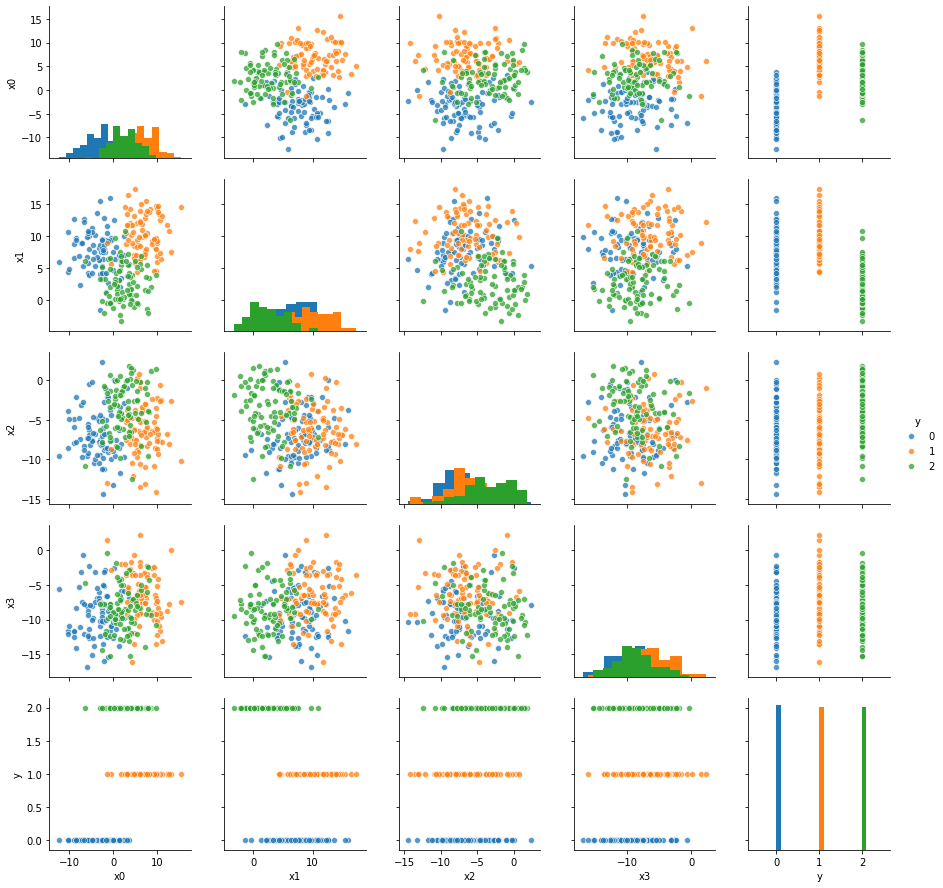

In [33]:
from sklearn.datasets import make_blobs

data = make_blobs(n_samples     = 250, 
                  n_features    = 4, 
                  centers       = 3, 
                  cluster_std   = 3.21)

df      = pd.DataFrame( data[0], columns = [ 'x{}'.format(str(i)) for i in range(len(data[0][1])) ] )
df['y'] = data[1]

sns.pairplot(df, plot_kws={'alpha':0.75}, hue='y', diag_kind='hist');

# oversampling

In [173]:
from imblearn.over_sampling import SMOTE, ADASYN, SMOTEN, SMOTENC, BorderlineSMOTE, KMeansSMOTE, SVMSMOTE
from sklearn.preprocessing import StandardScaler

```
"FS": suffered fouls,
"PE": missed passes,
"A": assistances,
"FT": shots on the post,
"FD": defended shots,
"FF": shots off target,
"G": goals,
"I": offsides,
"PP": missed penalties,
"RB": successful tackes,
"FC": fouls commited,
"GC": own goals,
"CA": yellow cards,
"CV": red cards,
"SG": clean sheets (only defenders),
"DD": difficult defenses (only goalies),
"DP": defended penalties (only goalies),
"GS": suffered goals (only goalies)
```

In [147]:
df = pd.read_csv('~/Documents/data/cartola-fc-brasil-scouts/jogadores.csv')

df = df.sort_values(by=["ano", "rodada"]).copy()
df['id']  = df['Nome'].apply( lambda x: hashlib.sha1(str.encode(x)).hexdigest() )
df['pos'] = df['Nome'].apply( lambda x: x.split('(')[-1].split(')')[0].strip() )

# df["G"] = df["G"].fillna(0).diff()
# df["A"] = df["A"].fillna(0).diff()

# df = df.query("(A >= 0 & G >= 0)").copy()

# display( df.sort_values(by="Nome") )
display( df )

scouts  = ['DS','G','A','SG','FS','FF','FD','FT','DD','DP','GC','CV','CA','PP','GS','FC','I','PI','RB','PE']
mercado = ['Preço', 'Média','Variação']
keys    = ["id", "ano"]

gscouts = df.groupby(keys)[scouts].agg(['sum', 'max'])
gscouts.columns = gscouts.columns.map('_'.join)
gscouts = gscouts.reset_index()

gmercado = df.groupby(keys)[mercado].agg(['sum', 'max'])
gmercado.columns = gmercado.columns.map('_'.join)
gmercado = gmercado.reset_index()

gpos = df.groupby(keys)[['pos']].agg(['first'])
gpos.columns = gpos.columns.map('_'.join)
gpos = gpos.reset_index()

print("gscouts")
display(gscouts.sample(5))
print("gmercado")
display(gmercado.sample(5))
print("gpos")
display(gpos.sample(5))

display(gpos['pos_first'].value_counts())

,Nome,Clube,Preço,J,Média,Últ. Pont.,Variação,DS,G,A,...,GS,FC,I,PI,rodada,ano,RB,PE,id,pos
7882,Ricardo Bueno (ATA),Ceará,18.52,1.0,22.70,22.7,14.52,NaN,2.0,1.0,...,NaN,2.0,1.0,NaN,1,2019,1.0,1.0,1f4d452190fb0558c5f5696b944b9afe4b02ca08,ATA
7883,Bruno Henrique (ATA),Flamengo,21.51,1.0,21.00,21.0,11.51,NaN,2.0,NaN,...,NaN,1.0,NaN,NaN,1,2019,NaN,NaN,9f9a076464350d81d76c9b8940d64b9890e4b053,ATA
7884,Nikão (MEI),Athlético-PR,19.29,1.0,18.80,18.8,10.29,NaN,1.0,NaN,...,NaN,1.0,NaN,NaN,1,2019,5.0,NaN,9752a812f300239c0f4fcae95d41e2843653a308,MEI
7885,Tiepo (GOL),Chapecoense,13.18,1.0,17.00,17.0,11.18,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,2019,NaN,NaN,ec9799d86e28ec368cccfb660bf39ff3bc3eed7c,GOL
7886,Vanderlei (GOL),Santos,22.69,1.0,15.70,15.7,5.69,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,1,2019,NaN,1.0,a5dde5accc0044a9808b0257f6faa5ba89342b7f,GOL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7877,Jadson (MEI),Athlético-PR,3.53,9.0,0.11,0.8,-0.40,NaN,NaN,NaN,...,NaN,3.0,NaN,40.0,38,2020,NaN,NaN,fe95e28e44efa7db07376c045a2fa89332ea5308,MEI
7878,Patrick de Lucca (MEI),Bahia,0.77,3.0,-0.23,-1.5,-0.29,1.0,NaN,NaN,...,NaN,NaN,NaN,25.0,38,2020,NaN,NaN,0157594398527348fc28f663c44291f22f8172ae,MEI
7879,Guilherme Biro (ATA),Coritiba,0.77,8.0,-0.32,-3.6,-0.21,15.0,NaN,NaN,...,NaN,14.0,NaN,41.0,38,2020,NaN,NaN,3e299fb9c705d57573fa4ab8a1a9f607edc60dc2,ATA
7880,Gabriel Pereira (MEI),Corinthians,0.79,5.0,-0.40,0.0,0.00,1.0,NaN,NaN,...,NaN,6.0,NaN,15.0,38,2020,NaN,NaN,90a8b33c4ac288f85fa4a7e678592dd30600d8a4,MEI


gscouts


,id,ano,DS_sum,DS_max,G_sum,G_max,A_sum,A_max,SG_sum,SG_max,...,FC_sum,FC_max,I_sum,I_max,PI_sum,PI_max,RB_sum,RB_max,PE_sum,PE_max
647,7fb79f2c1099c482640eb4ea209594e1f8e72846,2020,17.0,5.0,0.0,NaN,0.0,NaN,0.0,NaN,...,23.0,7.0,5.0,1.0,111.0,30.0,0.0,NaN,0.0,NaN
361,43b05fa390140d1f7771f53eedecb1b0bc1619ca,2020,136.0,23.0,6.0,1.0,10.0,1.0,0.0,NaN,...,122.0,24.0,0.0,NaN,618.0,108.0,0.0,NaN,0.0,NaN
681,89fcd561730cbd9cb19995a7106a268ed2bb8a1e,2019,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,...,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN
835,a894de02dd2fa07be9f2e89aea7bf81d0d07968d,2019,0.0,NaN,0.0,NaN,6.0,1.0,51.0,5.0,...,356.0,28.0,0.0,NaN,0.0,NaN,163.0,17.0,224.0,19.0
316,3b2a14fc3e68649d337380a40245246779562680,2019,0.0,NaN,10.0,1.0,10.0,1.0,0.0,NaN,...,74.0,13.0,17.0,3.0,0.0,NaN,44.0,7.0,141.0,20.0


gmercado


,id,ano,Preço_sum,Preço_max,Média_sum,Média_max,Variação_sum,Variação_max
768,9bc213788ba79383d3a4b82bfb3a371850aa1ab5,2020,70.22,8.19,21.91,2.98,-1.78,0.28
1092,dc087e601838e0fcb99b470960ae8ec1a254c9e4,2019,4.43,2.29,-1.60,-0.40,0.15,0.15
444,57d4cde16996418f8d0f9d1f8bd8e563f959f48c,2019,8.19,3.10,4.20,1.48,-0.29,0.43
138,15f862ea0463b3146d41330903d777c79dfdee46,2019,34.70,4.58,5.62,1.90,-2.25,0.23
475,5e094b84665763c98b0fa43b0df20649cef3b081,2020,1.53,1.53,1.22,1.22,0.45,0.45


gpos


,id,ano,pos_first
1033,d04122a8f3848b982342f8b819e1044b8f8b9761,2019,MEI
486,5f4ad3a451613a8a8f2e5b976a7ebedab56af7ed,2019,GOL
911,b4820d95916410300ca356cc90c10459a9664933,2020,ZAG
1167,e97b748cec0d997a70018804b652bcd9ab7c6ad6,2020,GOL
649,80c357ae469d62fd402d479e6e994872b1957cf8,2019,MEI


MEI    408
ATA    285
ZAG    203
LAT    200
GOL     96
TEC     91
Name: pos_first, dtype: int64

In [166]:
X = pd.concat([gscouts.drop(columns=keys), gmercado.drop(columns=keys), gpos.drop(columns=keys)], axis=1).copy()

In [167]:
col_1 = "Média_max"
col_2 = "Variação_max"

In [168]:
xx = X.query("pos_first in ['GOL', 'MEI']")[[col_1, col_2]]
yy = X.query("pos_first in ['GOL', 'MEI']")['pos_first']

## SMOTE

In [159]:
X_resampled, y_resampled = SMOTE().fit_resample(xx, yy)

In [160]:
XX = pd.concat([X_resampled, y_resampled], axis=1).copy()

In [161]:
display( X['pos_first'].value_counts().sort_index() )
display( XX['pos_first'].value_counts().sort_index() )

ATA    285
GOL     96
LAT    200
MEI    408
TEC     91
ZAG    203
Name: pos_first, dtype: int64

GOL    408
MEI    408
Name: pos_first, dtype: int64

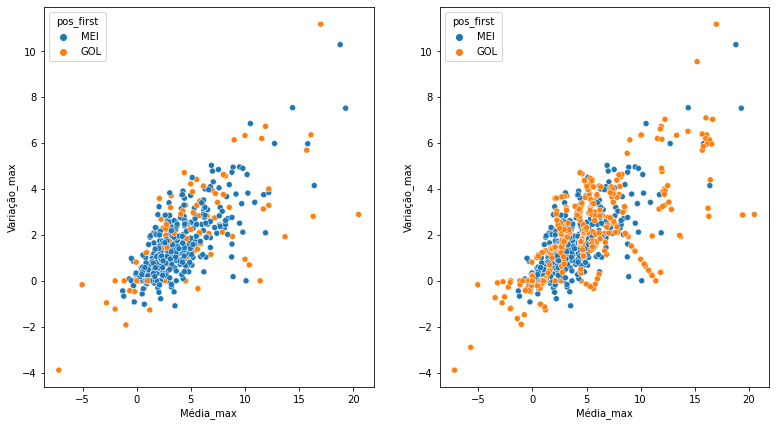

In [164]:
f, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2)

sns.scatterplot(data=X.query("pos_first in ['GOL', 'MEI']"), x=col_1, y=col_2, hue="pos_first", ax=ax1) ; 
sns.scatterplot(data=XX, x=col_1, y=col_2, hue="pos_first", ax=ax2) ;

## BorderlineSMOTE

In [170]:
X_resampled, y_resampled = BorderlineSMOTE().fit_resample(xx, yy)

In [171]:
XX = pd.concat([X_resampled, y_resampled], axis=1).copy()

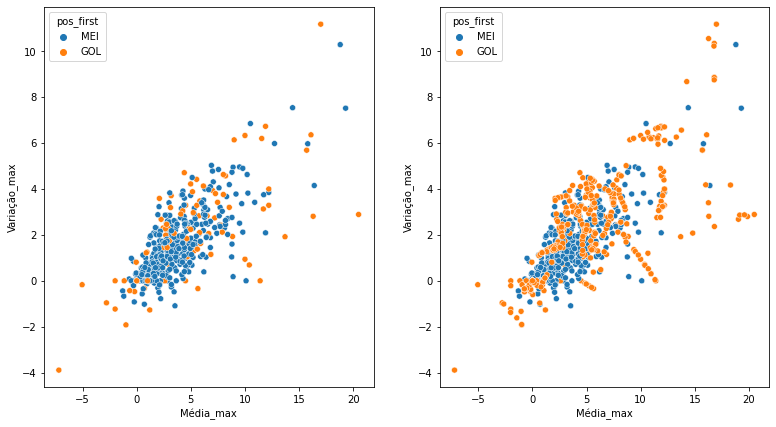

In [172]:
f, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2)

sns.scatterplot(data=X.query("pos_first in ['GOL', 'MEI']"), x=col_1, y=col_2, hue="pos_first", ax=ax1) ; 
sns.scatterplot(data=XX, x=col_1, y=col_2, hue="pos_first", ax=ax2) ;

## KMeansSMOTE

In [174]:
X_resampled, y_resampled = KMeansSMOTE().fit_resample(xx, yy)

In [175]:
XX = pd.concat([X_resampled, y_resampled], axis=1).copy()

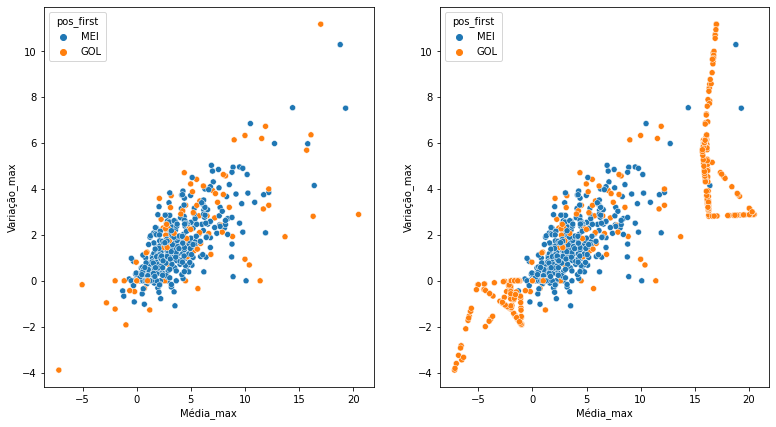

In [176]:
f, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2)

sns.scatterplot(data=X.query("pos_first in ['GOL', 'MEI']"), x=col_1, y=col_2, hue="pos_first", ax=ax1) ; 
sns.scatterplot(data=XX, x=col_1, y=col_2, hue="pos_first", ax=ax2) ;

In [177]:
X_resampled, y_resampled = KMeansSMOTE(k_neighbors=3).fit_resample(xx, yy)

In [178]:
XX = pd.concat([X_resampled, y_resampled], axis=1).copy()

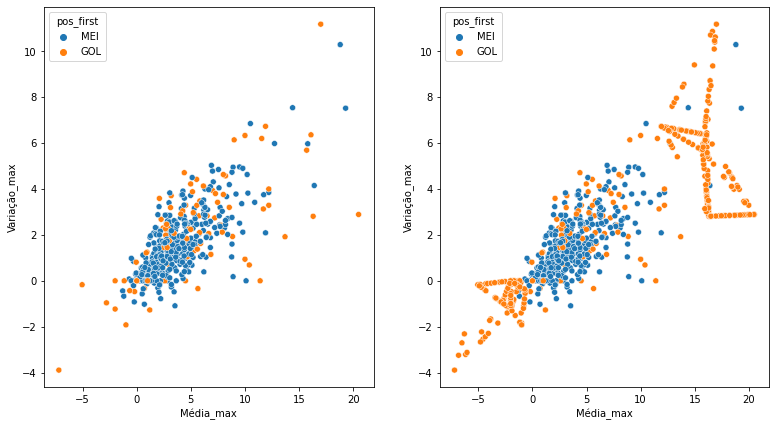

In [179]:
f, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2)

sns.scatterplot(data=X.query("pos_first in ['GOL', 'MEI']"), x=col_1, y=col_2, hue="pos_first", ax=ax1) ; 
sns.scatterplot(data=XX, x=col_1, y=col_2, hue="pos_first", ax=ax2) ;

## ADASYN

In [180]:
X_resampled, y_resampled = ADASYN().fit_resample(xx, yy)

In [181]:
XX = pd.concat([X_resampled, y_resampled], axis=1).copy()

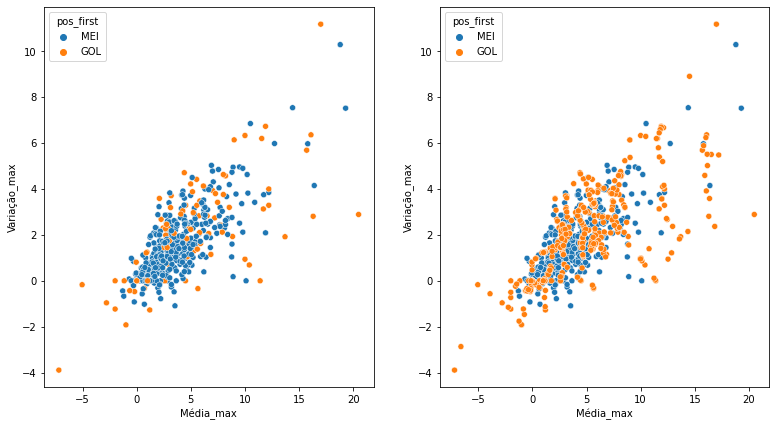

In [182]:
f, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2)

sns.scatterplot(data=X.query("pos_first in ['GOL', 'MEI']"), x=col_1, y=col_2, hue="pos_first", ax=ax1) ; 
sns.scatterplot(data=XX, x=col_1, y=col_2, hue="pos_first", ax=ax2) ;

## SVMSMOTE

In [183]:
X_resampled, y_resampled = SVMSMOTE().fit_resample(xx, yy)

In [184]:
XX = pd.concat([X_resampled, y_resampled], axis=1).copy()

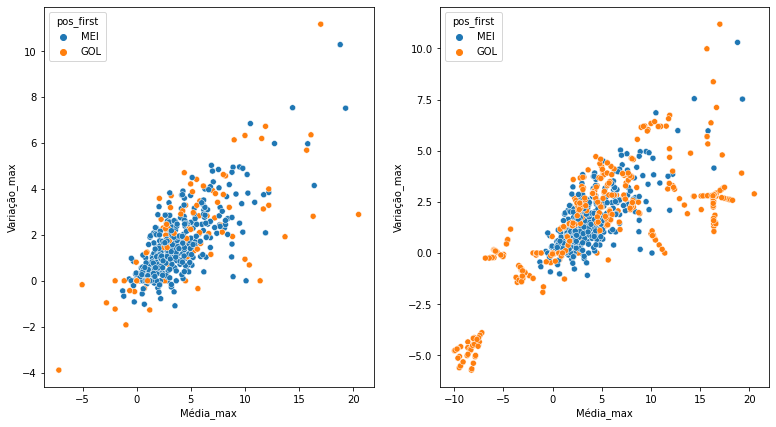

In [185]:
f, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2)

sns.scatterplot(data=X.query("pos_first in ['GOL', 'MEI']"), x=col_1, y=col_2, hue="pos_first", ax=ax1) ; 
sns.scatterplot(data=XX, x=col_1, y=col_2, hue="pos_first", ax=ax2) ;

## SMOTENC

In [186]:
df = pd.read_csv('~/Documents/data/cartola-fc-brasil-scouts/jogadores.csv')

df = df.sort_values(by=["ano", "rodada"]).copy()
df['id']  = df['Nome'].apply( lambda x: hashlib.sha1(str.encode(x)).hexdigest() )
df['pos'] = df['Nome'].apply( lambda x: x.split('(')[-1].split(')')[0].strip() )

scouts  = ['Clube', 'DS','G','A','SG','FS','FF','FD','FT','DD','DP','GC','CV','CA','PP','GS','FC','I','PI','RB','PE']
mercado = ['Preço', 'Média','Variação']
keys    = ["id", "ano"]

gscouts = df.groupby(keys)[scouts].agg(['sum', 'max'])
gscouts.columns = gscouts.columns.map('_'.join)
gscouts = gscouts.reset_index()

gmercado = df.groupby(keys)[mercado].agg(['sum', 'max'])
gmercado.columns = gmercado.columns.map('_'.join)
gmercado = gmercado.reset_index()

gpos = df.groupby(keys)[['pos']].agg(['first'])
gpos.columns = gpos.columns.map('_'.join)
gpos = gpos.reset_index()

display(gpos['pos_first'].value_counts())

MEI    408
ATA    285
ZAG    203
LAT    200
GOL     96
TEC     91
Name: pos_first, dtype: int64

In [187]:
X = pd.concat([gscouts.drop(columns=keys), gmercado.drop(columns=keys), gpos.drop(columns=keys)], axis=1).copy()

In [189]:
xx = X.query("pos_first in ['GOL', 'MEI']")[[col_1, col_2, "Clube_max"]]
yy = X.query("pos_first in ['GOL', 'MEI']")['pos_first']

In [195]:
X_resampled, y_resampled = SMOTENC(categorical_features=[2]).fit_resample(xx, yy)

In [196]:
XX = pd.concat([X_resampled, y_resampled], axis=1).copy()

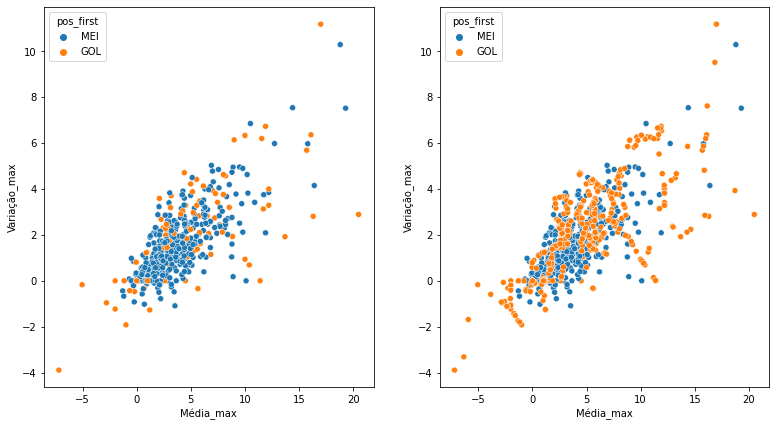

In [197]:
f, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2)

sns.scatterplot(data=X.query("pos_first in ['GOL', 'MEI']"), x=col_1, y=col_2, hue="pos_first", ax=ax1) ; 
sns.scatterplot(data=XX, x=col_1, y=col_2, hue="pos_first", ax=ax2) ;

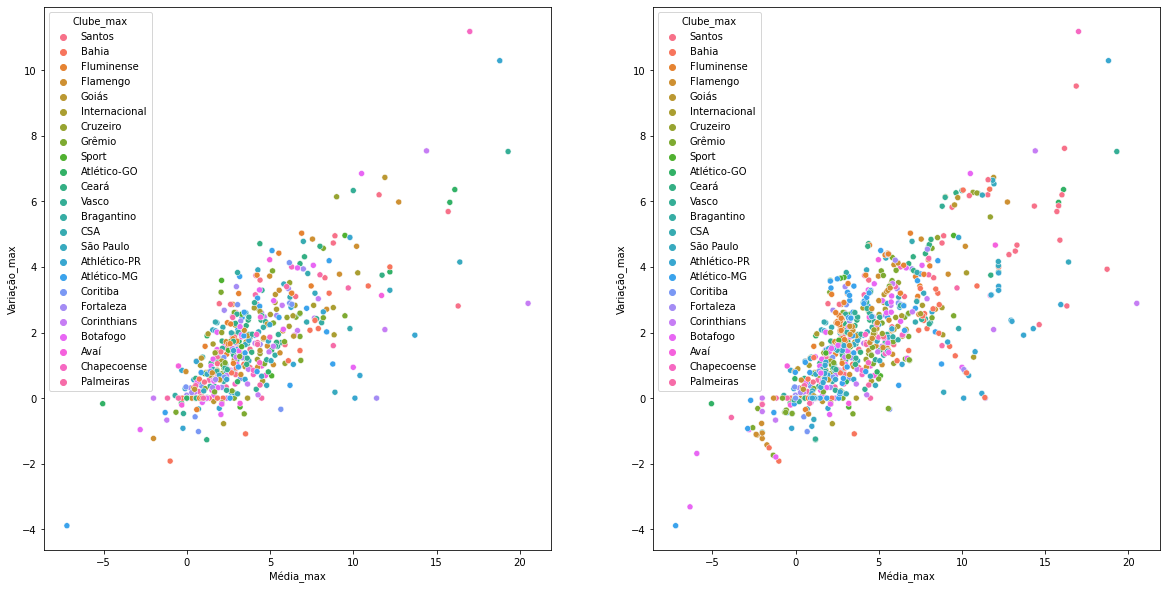

In [201]:
f, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2, figsize=(20,10))

sns.scatterplot(data=X.query("pos_first in ['GOL', 'MEI']"), x=col_1, y=col_2, hue="Clube_max", ax=ax1) ; 
sns.scatterplot(data=XX, x=col_1, y=col_2, hue="Clube_max", ax=ax2) ;

.